In [1]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Cargamos nuestras imagenes
ruta_dataset = '/content/drive/MyDrive/Brain Tumor Data Set'
print(os.listdir(ruta_dataset))

['Healthy', 'Brain Tumor']


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizamos las imágenes (valores entre 0 y 1)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Tamaño esperado por la CNN
img_size = (150, 150)  #redimensionar a  150x150 pixeles
batch_size = 32

# Conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    ruta_dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Conjunto de validación
val_generator = datagen.flow_from_directory(
    ruta_dataset,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 3676 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


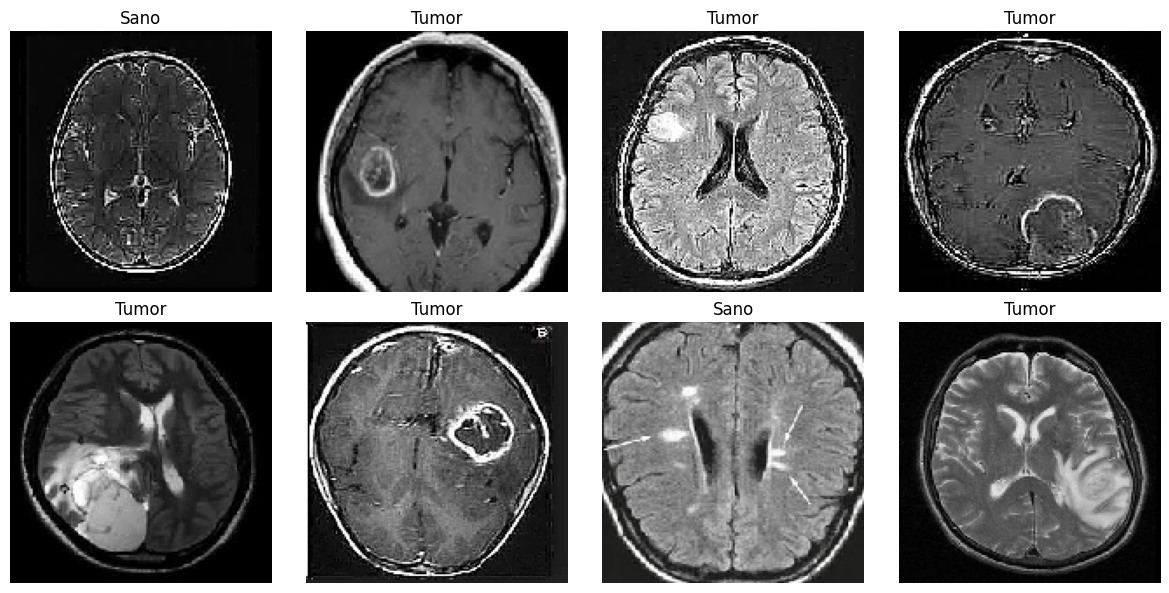

In [18]:
import matplotlib.pyplot as plt

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_generator)

# Mostrar las primeras 8 imágenes del lote
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title('Tumor' if labels[i] == 0 else 'Sano')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [19]:
print(train_generator.class_indices)

{'Brain Tumor': 0, 'Healthy': 1}


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2), #capa con 32 filtros y reducimos el tamaño a la mitad

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(), #aplanamos los datos
    layers.Dense(128, activation='relu'), #capa con 128 neuronas
    layers.Dropout(0.5), #apaga el 50% de las neuronas durante el entrenamiento
    layers.Dense(1, activation='sigmoid')  # Salida binaria
])

modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

modelo.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = modelo.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.6603 - loss: 0.6352 - val_accuracy: 0.8290 - val_loss: 0.4190
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.8307 - loss: 0.3729 - val_accuracy: 0.8508 - val_loss: 0.3466
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9023 - loss: 0.2492 - val_accuracy: 0.9314 - val_loss: 0.1952
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9300 - loss: 0.2000 - val_accuracy: 0.9575 - val_loss: 0.1067
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9686 - loss: 0.0994 - val_accuracy: 0.9793 - val_loss: 0.0612
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9734 - loss: 0.0740 - val_accuracy: 0.9924 - val_loss: 0.0346
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9852 - loss: 0.0459 - val_accuracy: 0.9946 - val_loss: 0.0314
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9875 - loss: 0.0338 - val_accu

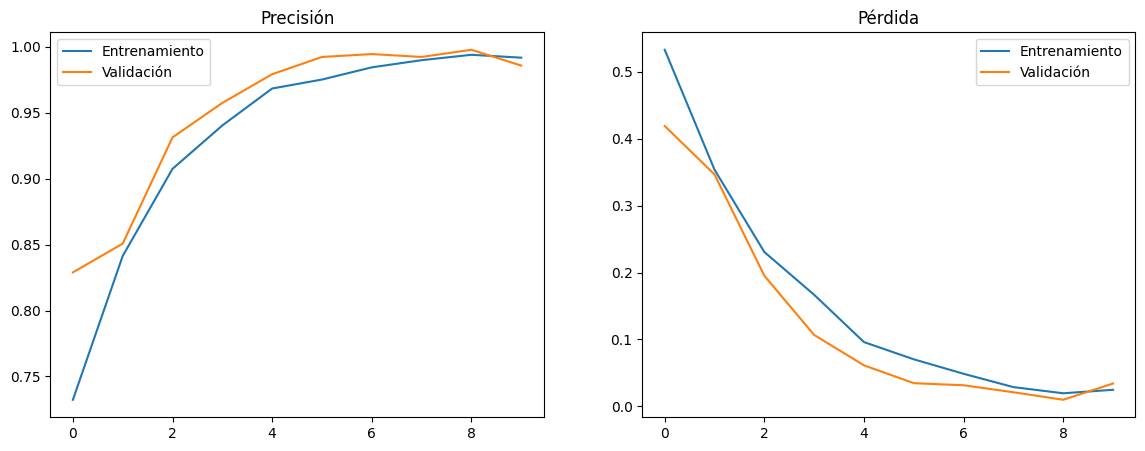

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(14, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida')
plt.legend()

plt.show()


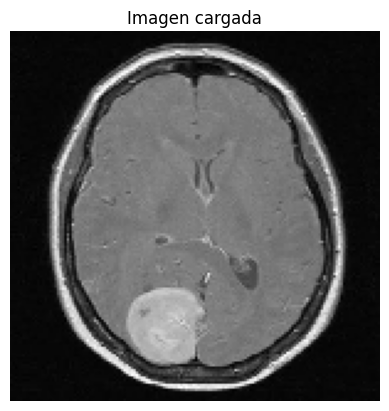

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
🔴 Tumor detectado (probabilidad 89.25%)


In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Ruta del archivo subido
ruta_imagen = '/content/drive/MyDrive/image(118).jpg'

# Cargar la imagen
img = image.load_img(ruta_imagen, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()

# Preprocesar la imagen
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalizamos
img_array = np.expand_dims(img_array, axis=0)  # Le damos forma (1, 150, 150, 3)

# Predecir
prediccion = modelo.predict(img_array)

if prediccion[0][0] > 0.5:
    print("🟢 Imagen sana (probabilidad {:.2f}%)".format(prediccion[0][0]*100))
else:
    print("🔴 Tumor detectado (probabilidad {:.2f}%)".format((1 - prediccion[0][0])*100))
